<a href="https://colab.research.google.com/github/umesha-D/-Hello-World-/blob/main/Lab1Activity2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Building_permits.csv to Building_permits (1).csv


In [ ]:
data = pd.read_csv("Building_permits.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
data

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,2.01505E+11,4,sign - erect,5/6/2015,326,23,140,NaN,Ellis,St,NaN,NaN,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,5/6/2015,11/9/2015,NaN,11/9/2015,NaN,6.0,NaN,NaN,NaN,11/3/2016,4000.0,4000.0,tourist hotel/motel,143.0,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1.380610e+12
1,2.01604E+11,4,sign - erect,4/19/2016,306,7,440,NaN,Geary,St,0.0,NaN,remove (e) awning and associated signs.,issued,8/3/2017,4/19/2016,8/3/2017,NaN,8/3/2017,NaN,7.0,NaN,NaN,NaN,12/3/2017,1.0,500.0,tourist hotel/motel,NaN,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1.420160e+12
2,2.01605E+11,3,additions alterations or repairs,5/27/2016,595,203,1647,NaN,Pacific,Av,NaN,NaN,installation of separating wall,withdrawn,9/26/2017,5/27/2016,NaN,NaN,NaN,NaN,6.0,6.0,NaN,NaN,NaN,20000.0,NaN,retail sales,39.0,retail sales,39.0,2.0,NaN,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1.424860e+12
3,2.01611E+11,8,otc alterations permit,11/7/2016,156,11,1230,NaN,Pacific,Av,0.0,NaN,repair dryrot & stucco at front of bldg.,complete,7/24/2017,11/7/2016,7/18/2017,7/24/2017,7/18/2017,NaN,2.0,2.0,NaN,NaN,7/13/2018,2000.0,2000.0,1 family dwelling,1.0,1 family dwelling,1.0,2.0,NaN,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1.443570e+12
4,2.01611E+11,6,demolitions,11/28/2016,342,1,950,NaN,Market,St,NaN,NaN,demolish retail/office/commercial 3-story buil...,issued,12/1/2017,11/28/2016,12/1/2017,NaN,11/20/2017,NaN,3.0,NaN,NaN,NaN,12/1/2018,100000.0,100000.0,retail sales,NaN,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",1.445480e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17642,M862628,8,otc alterations permit,12/5/2017,113,017A,1228,NaN,Montgomery,St,NaN,NaN,street space,issued,12/5/2017,12/5/2017,12/5/2017,NaN,12/5/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.489340e+12
17643,2.01712E+11,8,otc alterations permit,12/5/2017,271,14,580,NaN,Bush,St,NaN,NaN,fire alarm upgrade ref 201704123852,issued,12/6/2017,12/5/2017,12/6/2017,NaN,12/6/2017,NaN,4.0,4.0,NaN,Y,4/6/2018,5000.0,5000.0,apartments,4.0,apartments,4.0,2.0,NaN,5.0,wood frame (5),5.0,wood frame (5),NaN,NaN,NaN,NaN,NaN,1.489460e+12
17644,M863507,8,otc alterations permit,12/6/2017,4318,19,1568,NaN,Indiana,St,NaN,NaN,street space,issued,12/6/2017,12/6/2017,12/6/2017,NaN,12/6/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.489540e+12
17645,M863747,8,otc alterations permit,12/6/2017,298,29,795,NaN,Sutter,St,NaN,NaN,street space permit,issued,12/6/2017,12/6/2017,12/6/2017,NaN,12/6/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.489610e+12


In [ ]:
data.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,2.01505E+11,4,sign - erect,5/6/2015,326,23,140,NaN,Ellis,St,NaN,NaN,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,5/6/2015,11/9/2015,NaN,11/9/2015,NaN,6.0,NaN,NaN,NaN,11/3/2016,4000.0,4000.0,tourist hotel/motel,143.0,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1.380610e+12
1,2.01604E+11,4,sign - erect,4/19/2016,306,7,440,NaN,Geary,St,0.0,NaN,remove (e) awning and associated signs.,issued,8/3/2017,4/19/2016,8/3/2017,NaN,8/3/2017,NaN,7.0,NaN,NaN,NaN,12/3/2017,1.0,500.0,tourist hotel/motel,NaN,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1.420160e+12
2,2.01605E+11,3,additions alterations or repairs,5/27/2016,595,203,1647,NaN,Pacific,Av,NaN,NaN,installation of separating wall,withdrawn,9/26/2017,5/27/2016,NaN,NaN,NaN,NaN,6.0,6.0,NaN,NaN,NaN,20000.0,NaN,retail sales,39.0,retail sales,39.0,2.0,NaN,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1.424860e+12
3,2.01611E+11,8,otc alterations permit,11/7/2016,156,11,1230,NaN,Pacific,Av,0.0,NaN,repair dryrot & stucco at front of bldg.,complete,7/24/2017,11/7/2016,7/18/2017,7/24/2017,7/18/2017,NaN,2.0,2.0,NaN,NaN,7/13/2018,2000.0,2000.0,1 family dwelling,1.0,1 family dwelling,1.0,2.0,NaN,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1.443570e+12
4,2.01611E+11,6,demolitions,11/28/2016,342,1,950,NaN,Market,St,NaN,NaN,demolish retail/office/commercial 3-story buil...,issued,12/1/2017,11/28/2016,12/1/2017,NaN,11/20/2017,NaN,3.0,NaN,NaN,NaN,12/1/2018,100000.0,100000.0,retail sales,NaN,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",1.445480e+11


In [ ]:
data.shape

(17647, 43)

In [ ]:
col_num=0
TotalObjects =data.shape[0]
print ("Column\t\t\t\t\t Null Values%")
for x in data:
  nullCount = data[x].isnull().sum();
  nullPercent = nullCount*100 / (TotalObjects)
  if nullCount > 0 and nullPercent > 20 :
    col_num=col_num+1
    data.drop(x, axis=1,inplace=True)
    print(str(x)+"\t\t\t\t\t "+str(nullPercent))
print ("A total of "+str(col_num)+" deleted !")


Column					 Null Values%
Street Number Suffix					 98.71932906443021
Unit					 86.14495381651273
Unit Suffix					 98.8383294610982
Completed Date					 62.4242080806936
Structural Notification					 96.81532271774239
Number of Existing Stories					 20.81940273134244
Number of Proposed Stories					 21.063070210234034
Voluntary Soft-Story Retrofit					 99.96033320111067
Fire Only Permit					 89.88496628322095
Permit Expiration Date					 30.022100073666913
Existing Use					 20.230067433558112
Existing Units					 26.51442171473905
Proposed Use					 20.802402674675584
Proposed Units					 26.35575451918173
TIDF Compliance					 100.0
Existing Construction Type					 21.108403694678984
Existing Construction Type Description					 21.108403694678984
Proposed Construction Type					 21.284070946903157
Proposed Construction Type Description					 21.284070946903157
Site Permit					 97.5803252677509
A total of 20 deleted !


In [ ]:
data= data.drop(['Current Status Date','Description','Block','Lot','Supervisor District','Zipcode','Neighborhoods - Analysis Boundaries','Location'], axis =1)

In [ ]:
data

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Street Number,Street Name,Street Suffix,Current Status,Filed Date,Issued Date,First Construction Document Date,Estimated Cost,Revised Cost,Plansets,Record ID
0,2.01505E+11,4,sign - erect,5/6/2015,140,Ellis,St,expired,5/6/2015,11/9/2015,11/9/2015,4000.0,4000.0,2.0,1.380610e+12
1,2.01604E+11,4,sign - erect,4/19/2016,440,Geary,St,issued,4/19/2016,8/3/2017,8/3/2017,1.0,500.0,2.0,1.420160e+12
2,2.01605E+11,3,additions alterations or repairs,5/27/2016,1647,Pacific,Av,withdrawn,5/27/2016,NaN,NaN,20000.0,NaN,2.0,1.424860e+12
3,2.01611E+11,8,otc alterations permit,11/7/2016,1230,Pacific,Av,complete,11/7/2016,7/18/2017,7/18/2017,2000.0,2000.0,2.0,1.443570e+12
4,2.01611E+11,6,demolitions,11/28/2016,950,Market,St,issued,11/28/2016,12/1/2017,11/20/2017,100000.0,100000.0,2.0,1.445480e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17642,M862628,8,otc alterations permit,12/5/2017,1228,Montgomery,St,issued,12/5/2017,12/5/2017,12/5/2017,NaN,1.0,NaN,1.489340e+12
17643,2.01712E+11,8,otc alterations permit,12/5/2017,580,Bush,St,issued,12/5/2017,12/6/2017,12/6/2017,5000.0,5000.0,2.0,1.489460e+12
17644,M863507,8,otc alterations permit,12/6/2017,1568,Indiana,St,issued,12/6/2017,12/6/2017,12/6/2017,NaN,1.0,NaN,1.489540e+12
17645,M863747,8,otc alterations permit,12/6/2017,795,Sutter,St,issued,12/6/2017,12/6/2017,12/6/2017,NaN,1.0,NaN,1.489610e+12


In [19]:
pd.unique(data['Estimated Cost'].values)

array([4000.0, 1.0, 20000.0, ..., 20300.0, 760000.0, 18453.12],
      dtype=object)

In [20]:
def CalculateEstimatedCost(year):
  if year == '< 1 year':
    return 0.5
  elif year == '10+ years':
    return 10
  else:
    yr=str(year)
  return yr.rstrip(' years')

In [21]:
data['Estimated Cost']=data['Estimated Cost'].apply(CalculateEstimatedCost)

In [22]:
data

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Street Number,Street Name,Street Suffix,Current Status,Filed Date,Issued Date,First Construction Document Date,Estimated Cost,Revised Cost,Plansets,Record ID
0,2.01505E+11,4,sign - erect,5/6/2015,140,Ellis,St,expired,5/6/2015,11/9/2015,11/9/2015,4000.0,4000.0,2.000000,1.380610e+12
1,2.01604E+11,4,sign - erect,4/19/2016,440,Geary,St,issued,4/19/2016,8/3/2017,8/3/2017,1.0,500.0,2.000000,1.420160e+12
2,2.01605E+11,3,additions alterations or repairs,5/27/2016,1647,Pacific,Av,withdrawn,5/27/2016,NaN,NaN,20000.0,0.0,2.000000,1.424860e+12
3,2.01611E+11,8,otc alterations permit,11/7/2016,1230,Pacific,Av,complete,11/7/2016,7/18/2017,7/18/2017,2000.0,2000.0,2.000000,1.443570e+12
4,2.01611E+11,6,demolitions,11/28/2016,950,Market,St,issued,11/28/2016,12/1/2017,11/20/2017,100000.0,100000.0,2.000000,1.445480e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17642,M862628,8,otc alterations permit,12/5/2017,1228,Montgomery,St,issued,12/5/2017,12/5/2017,12/5/2017,Unknown,1.0,1.200235,1.489340e+12
17643,2.01712E+11,8,otc alterations permit,12/5/2017,580,Bush,St,issued,12/5/2017,12/6/2017,12/6/2017,5000.0,5000.0,2.000000,1.489460e+12
17644,M863507,8,otc alterations permit,12/6/2017,1568,Indiana,St,issued,12/6/2017,12/6/2017,12/6/2017,Unknown,1.0,1.200235,1.489540e+12
17645,M863747,8,otc alterations permit,12/6/2017,795,Sutter,St,issued,12/6/2017,12/6/2017,12/6/2017,Unknown,1.0,1.200235,1.489610e+12


In [23]:
def CalculateEstimatedCostRanges(value):
  if value <= 5000:
    return '5K and Below'
  if value > 5000 and value <= 10000:
    return '5K-10K'
  if value > 10000 and value <= 15000:
    return '10K-15K'
  if value > 15000 and value <= 20000:
    return '15K-20K'
  if value > 20000 and value <= 25000:
    return '20K-25K'
  if value > 25000 and value <= 30000:
    return '25K-30K'
  if value > 30000 :
    return '30K and Above'
  return 'Other'

In [27]:
loan_ranges =data['Revised Cost'].apply(CalculateEstimatedCostRanges)

In [28]:
loan_ranges.value_counts()

5K and Below     9253
30K and Above    3275
5K-10K           1975
10K-15K          1178
15K-20K           973
20K-25K           548
25K-30K           445
Name: Revised Cost, dtype: int64

Text(0.5, 1.0, 'Pie Chart of Loan Amount')

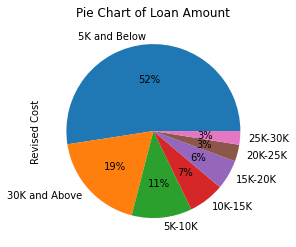

In [29]:
f = plt.figure()
loan_ranges.value_counts().plot.pie(autopct='%1.0f%%',)
plt.title('Pie Chart of Loan Amount')

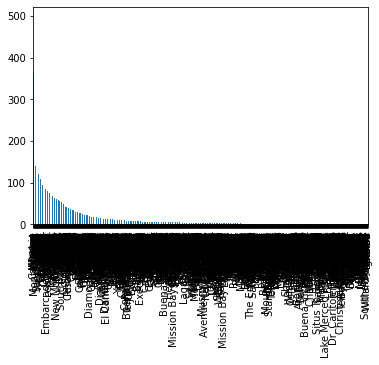

In [31]:
pur = data['Street Name'].value_counts()
pur.plot(kind='bar')